# U.S. UFO Sightings
---

### Analysis - Number of Sightings over Time

- This analysis comes from the clean version of our UFO Data, which includes filtering to only those sightings within the United States. In this notebook, we look at trends in the number of UFO sightings over the decades, and separated out by five major U.S. regions.

-- Comparisons/Conclusions: Our overall number of sightings see a marked increase from the 80s to the 90s, and huge spike from the 90s to the 2000s, regardless of region. We know that the television series, X-Files, was on air from 1993 until 2002, so that does happen to coincide with the most significant spike in the number of sightings. Additionally, although the internet was technically invented in the early 80s, it became a publically established phenomenon in the mid to late 90s.

In [128]:
import requests
# from config_weather_api_key import api_key
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json
import time
import hvplot.pandas
import scipy.stats as stats
from scipy.stats import linregress

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [129]:
# Read the clean CSV file
df = pd.read_csv("../Data/clean_UFO.csv")

#View the first 5 rows 
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111,1949,10,False
1,1956-10-10 21:00:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956,10,False
2,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960,10,False
3,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,1961,10,False
4,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,41.117500,-73.408333,1965,10,True


In [130]:
df.nunique()

Date_time                      55652
city                           11235
state/province                    52
country                            1
UFO_shape                         19
length_of_encounter_seconds      460
description                    63321
latitude                       11495
longitude                      12293
year                              83
month                             12
is_weekend                         2
dtype: int64

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63553 entries, 0 to 63552
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date_time                    63553 non-null  object 
 1   city                         63553 non-null  object 
 2   state/province               63553 non-null  object 
 3   country                      63553 non-null  object 
 4   UFO_shape                    63553 non-null  object 
 5   length_of_encounter_seconds  63553 non-null  float64
 6   description                  63553 non-null  object 
 7   latitude                     63553 non-null  float64
 8   longitude                    63553 non-null  float64
 9   year                         63553 non-null  int64  
 10  month                        63553 non-null  int64  
 11  is_weekend                   63553 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 5.4+ MB


In [132]:
# sort the entire dataframe by 'year', then 'month'
df.sort_values(by=["year", "month"], inplace=True)
df.head(50)

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend
8670,1910-01-01 00:00:00,kirksville (near),mo,us,disk,120.0,Historical sighting (1903 - 1913) Northern Mis...,40.194722,-92.583056,1910,1,True
37344,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,Cigar shaped object moving from West to East,32.709167,-96.008056,1910,6,False
37224,1920-06-11 21:00:00,cicero,in,us,other,60.0,((NUFORC Note: Probable hoax. Note date. PD...,40.123889,-86.013333,1920,6,False
16966,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60.0,Young boy witnesses disc in sky above Illinois...,41.420833,-90.015000,1925,12,False
49750,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60.0,we were traveling east of burns&#44clmbing up ...,43.642500,-118.627500,1929,7,False
21400,1931-02-15 14:00:00,holyoke (6-8 miles southwest of),co,us,oval,60.0,In the winter of 1931&#44 I saw a flying machi...,40.584444,-102.301944,1931,2,True
37345,1931-06-01 13:00:00,abilene,ks,us,disk,1800.0,This is a what my mother related to me regardi...,38.917222,-97.213611,1931,6,False
58901,1934-09-15 15:30:00,valley city (6.5 miles east of),nd,us,disk,5.0,Two brothers observe&#44 hear&#44 three black ...,46.923333,-98.002778,1934,9,True
1380,1936-10-15 17:00:00,eklutna,ak,us,cigar,180.0,Two men approached by a cigar-shaped object in...,61.458056,-149.362222,1936,10,False
38619,1937-06-15 00:00:00,hubbard,or,us,cylinder,10.0,It had a bluish tint with what looked like a c...,45.182500,-122.806667,1937,6,False


In [133]:
# look at a list of all the years present in our dataset
year_list = sorted(df['year'].unique().tolist())
print(year_list)

[1910, 1920, 1925, 1929, 1931, 1934, 1936, 1937, 1939, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


In [134]:
# Create the bins for number of sightings by decades
bins = [0, 1959, 1969, 1979, 1989, 1999, 2009, 2019]

# Create the names for the five bins
group_labels = ["pre_1960s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]

# Slice the data and place it into bins
pd.cut(df["year"], bins, labels=group_labels).value_counts()
# it's interesting that the decades don't see a steady increase over time

2000s        30158
2010s        22014
1990s         6500
1970s         1823
1980s         1588
1960s         1045
pre_1960s      425
Name: year, dtype: int64

In [135]:
# Place the decade data into a new column inside of the DataFrame
df["decades"] = pd.cut(df["year"], bins, labels=group_labels)
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend,decades
8670,1910-01-01 00:00:00,kirksville (near),mo,us,disk,120.0,Historical sighting (1903 - 1913) Northern Mis...,40.194722,-92.583056,1910,1,True,pre_1960s
37344,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,Cigar shaped object moving from West to East,32.709167,-96.008056,1910,6,False,pre_1960s
37224,1920-06-11 21:00:00,cicero,in,us,other,60.0,((NUFORC Note: Probable hoax. Note date. PD...,40.123889,-86.013333,1920,6,False,pre_1960s
16966,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60.0,Young boy witnesses disc in sky above Illinois...,41.420833,-90.015000,1925,12,False,pre_1960s
49750,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60.0,we were traveling east of burns&#44clmbing up ...,43.642500,-118.627500,1929,7,False,pre_1960s


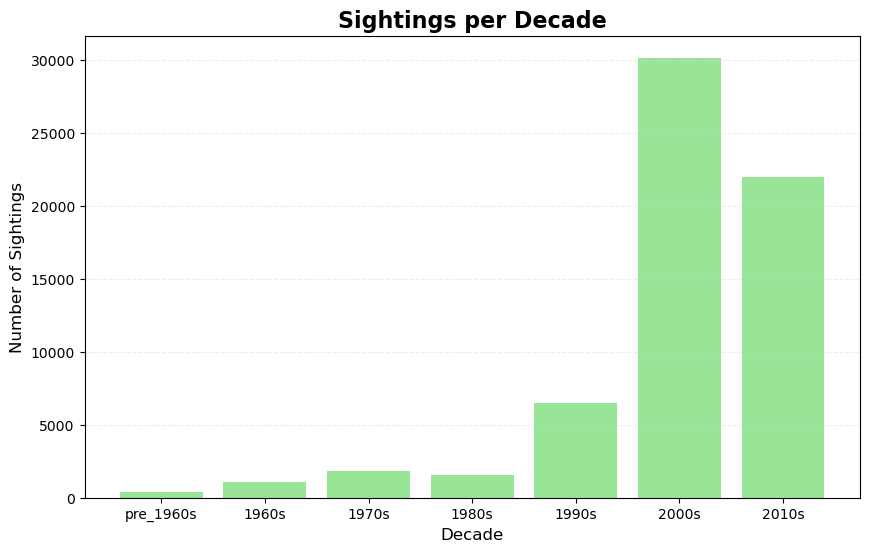

In [136]:
# Bar chart for number of sightings per decade
# create a new dataframe for the desired data
decades_count_df = df.groupby("decades")["year"].count().reset_index()

# init the plot
plt.figure(figsize=(10,6))
plt.bar(decades_count_df.decades, decades_count_df.year, color="limegreen", alpha=0.5, align="center")

# customize the plot
plt.title("Sightings per Decade", fontsize=16, fontweight="bold")
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Number of Sightings", fontsize=12)

plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.4)

# save the bar chart
plt.savefig("sightings_per_decade_bar.png")

# show the plot
plt.show()

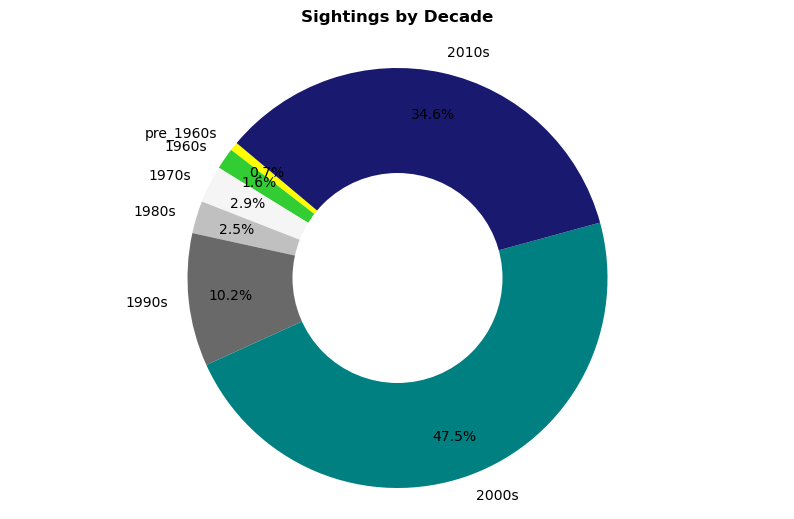

In [137]:
# Donut chart to look at number of sightings per decade in a proportionate way
# configure the chart
plt.figure(figsize=(10,6))
plt.pie(decades_count_df.year,
        labels=decades_count_df.decades,
        autopct="%1.1f%%",
        colors=["yellow", "limegreen","whitesmoke","silver","dimgrey","teal","midnightblue"],
        pctdistance=0.80,
        startangle=140)

# draw the chart
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Sightings by Decade\n", fontweight="bold")
plt.axis("equal")

# save the donut chart
plt.savefig("sightings_per_decade_donut.png")

# show the donut chart
plt.show()

In [138]:
# define US region groupings, and make a new column for "region"
southwest = ['az','tx','nm','ok']
southeast = ['al','ar','la','ms','tn','ky','wv','va','nc','sc','ga','fl']
northeast = ['me','nh','vt','ma','md','ri','ct','nj','de','pa','ny']
middle_west = ['nd','sd','ne','ks','mn','ia','mo','wi','il','mi','in','oh']
west = ['wa', 'mt', 'or', 'id', 'wy', 'co', 'nm', 'ca', 'az', 'nv', 'ut', 'ak', 'hi']
df["region"] = None

df.loc[df["state/province"].isin(southwest), "region"] = "Southwest"
df.loc[df["state/province"].isin(southeast), "region"] = "Southeast"
df.loc[df["state/province"].isin(northeast), "region"] = "Northeast"
df.loc[df["state/province"].isin(middle_west), "region"] = "Middle West"
df.loc[df["state/province"].isin(west), "region"] = "West"
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend,decades,region
8670,1910-01-01 00:00:00,kirksville (near),mo,us,disk,120.0,Historical sighting (1903 - 1913) Northern Mis...,40.194722,-92.583056,1910,1,True,pre_1960s,Middle West
37344,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,Cigar shaped object moving from West to East,32.709167,-96.008056,1910,6,False,pre_1960s,Southwest
37224,1920-06-11 21:00:00,cicero,in,us,other,60.0,((NUFORC Note: Probable hoax. Note date. PD...,40.123889,-86.013333,1920,6,False,pre_1960s,Middle West
16966,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60.0,Young boy witnesses disc in sky above Illinois...,41.420833,-90.015000,1925,12,False,pre_1960s,Middle West
49750,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60.0,we were traveling east of burns&#44clmbing up ...,43.642500,-118.627500,1929,7,False,pre_1960s,West


In [139]:
# look at number of sightings per region
df.region.value_counts()

West           21591
Southeast      13439
Middle West    13320
Northeast      11060
Southwest       4112
Name: region, dtype: int64

In [140]:
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend,decades,region
8670,1910-01-01 00:00:00,kirksville (near),mo,us,disk,120.0,Historical sighting (1903 - 1913) Northern Mis...,40.194722,-92.583056,1910,1,True,pre_1960s,Middle West
37344,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,Cigar shaped object moving from West to East,32.709167,-96.008056,1910,6,False,pre_1960s,Southwest
37224,1920-06-11 21:00:00,cicero,in,us,other,60.0,((NUFORC Note: Probable hoax. Note date. PD...,40.123889,-86.013333,1920,6,False,pre_1960s,Middle West
16966,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60.0,Young boy witnesses disc in sky above Illinois...,41.420833,-90.015000,1925,12,False,pre_1960s,Middle West
49750,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60.0,we were traveling east of burns&#44clmbing up ...,43.642500,-118.627500,1929,7,False,pre_1960s,West


In [141]:
# create a new dataframe to look at sightings per region over time (by decade)
decade_region_df = df.groupby(["decades", "region"])["year"].count().reset_index()
decade_region_df.head(10)

,decades,region,year
0,pre_1960s,Middle West,102
1,pre_1960s,Northeast,92
2,pre_1960s,Southeast,63
3,pre_1960s,Southwest,42
4,pre_1960s,West,126
5,1960s,Middle West,249
6,1960s,Northeast,251
7,1960s,Southeast,198
8,1960s,Southwest,79
9,1960s,West,267


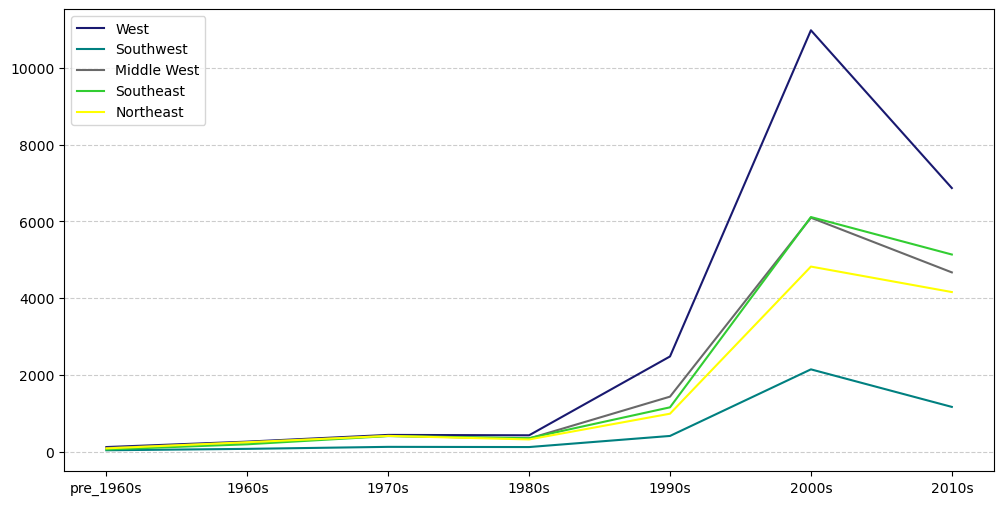

In [142]:
# Plot the number of sightings per decade for each region as a line chart
# define a variable for each region
west_timeline = decade_region_df[decade_region_df["region"] == "West"]
southwest_timeline = decade_region_df[decade_region_df["region"] == "Southwest"]
midwest_timeline = decade_region_df[decade_region_df["region"] == "Middle West"]
southeast_timeline = decade_region_df[decade_region_df["region"] == "Southeast"]
northeast_timeline = decade_region_df[decade_region_df["region"] == "Northeast"]

# configure the chart
plt.figure(figsize=(12,6))

plt.plot(west_timeline.decades, west_timeline.year, color="midnightblue", label="West")
plt.plot(southwest_timeline.decades, southwest_timeline.year, color="teal", label="Southwest")
plt.plot(midwest_timeline.decades, midwest_timeline.year, color="dimgrey", label="Middle West")
plt.plot(southeast_timeline.decades, southeast_timeline.year, color="limegreen", label="Southeast")
plt.plot(northeast_timeline.decades, northeast_timeline.year, color="yellow", label="Northeast")

plt.grid(axis="y", c="gray", linestyle="dashed", alpha=0.4)
plt.legend(loc="best")

# save the donut chart
plt.savefig("sightings_over_time_per_region.png")

# Show the chart
plt.show()